In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from tensorflow.keras.models import Sequential
from numpy.random import seed
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
tf.__version__

'2.9.2'

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

In [8]:
#Загружаем первый датасет (базальтопластик) и посмотрим на названия столбцов
df = pd.read_excel("Итог.xlsx")
df.shape

(922, 14)

In [9]:
df1=df.drop(['Unnamed: 0'],axis=1)

In [10]:
# Сформируем входы и выход для модели
tv = df1['Соотношение матрица-наполнитель']
tr_v = df1.loc[:, df1.columns != 'Соотношение матрица-наполнитель']
# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

In [11]:
tr_v

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
1,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
2,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
3,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
4,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
917,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
918,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
919,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
920,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler

In [14]:
x_train.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
408,1918.505388,923.222626,102.856973,21.778325,304.152923,99.372553,76.666930,2821.643613,189.650866,0,6.708062,41.984468
866,2011.164986,1224.526540,115.639182,18.218292,341.758888,969.003020,75.568206,3248.094836,224.963194,90,6.010934,60.034399
518,2116.647950,833.967349,102.944857,19.620920,233.750031,38.609529,70.221071,3533.008496,254.612780,90,7.809148,63.137907
790,1964.864776,1140.391684,96.812897,21.572128,284.781260,887.796828,72.871322,2412.682294,283.565146,90,3.640496,50.280645
281,1931.881912,1110.896831,62.620924,25.334082,294.211396,362.407115,76.493768,2787.386492,136.548332,0,5.991188,48.635969


In [15]:
y_train

408    2.254452
866    2.864568
518    5.295842
790    3.350539
281    3.307663
         ...   
327    3.048681
406    3.096419
268    3.223754
344    1.067339
619    2.519514
Name: Соотношение матрица-наполнитель, Length: 645, dtype: float64

In [16]:
y_train.shape

(645,)

In [17]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке
def mean_model(y_test):
    return [np.mean(y_test) for _ in range(len(y_test))]
y_pred_mean = mean_model(y_test)

In [18]:
value = [[x for x in range(0,5)],
         [x for x in range(10,15)],
         [x for x in range(20,25)]] 
value

[[0, 1, 2, 3, 4], [10, 11, 12, 13, 14], [20, 21, 22, 23, 24]]

In [19]:
value = np.array(value)         

print("Numpy array:", value)
sum = value.sum(axis=0)  
print("Mean:", sum / value.shape[0]) 

Numpy array: [[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]]
Mean: [10. 11. 12. 13. 14.]


In [20]:
mean = x_train.mean(axis=0)
x_train -= mean

In [21]:
std = x_train.std(axis=0)
x_train /= std

In [22]:
def norm(x):
  return (x - mean) / std

x_train = norm(x_train);
x_test = norm(x_test);

In [23]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train.min()

y_train = y_train - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_train.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_train /= max_y #приводим к 1 обучающую выборку

#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_test = y_test - min_y
y_test /= max_y

In [24]:
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu')),
model.add(Dense(32, activation='relu')),
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [26]:
print(model.summary()) # архитектура нашей модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,193
Trainable params: 16,193
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [28]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
19/19 - 1s - loss: 0.0523 - mae: 0.1791 - val_loss: 0.0424 - val_mae: 0.1549 - 595ms/epoch - 31ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0395 - mae: 0.1615 - val_loss: 0.0815 - val_mae: 0.2517 - 30ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0399 - mae: 0.1608 - val_loss: 0.0372 - val_mae: 0.1515 - 29ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0356 - mae: 0.1519 - val_loss: 0.0369 - val_mae: 0.1526 - 28ms/epoch - 1ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0379 - mae: 0.1567 - val_loss: 0.0720 - val_mae: 0.2350 - 29ms/epoch - 2ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0366 - mae: 0.1540 - val_loss: 0.0372 - val_mae: 0.1523 - 28ms/epoch - 1ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0373 - mae: 0.1551 - val_loss: 0.0458 - val_mae: 0.1811 - 28ms/epoch - 1ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0372 - mae: 0.1553 - val_loss: 0.0396 - val_mae: 0.1632 - 28ms/epoch - 1ms/step
Epoch 9/100
19/19 - 0s - loss: 0.0359 - mae: 0.1526 - val_loss: 0.0431 - val_mae: 0.1741 - 27m

Epoch 73/100
19/19 - 0s - loss: 0.0352 - mae: 0.1512 - val_loss: 0.0386 - val_mae: 0.1598 - 38ms/epoch - 2ms/step
Epoch 74/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0385 - val_mae: 0.1593 - 40ms/epoch - 2ms/step
Epoch 75/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0384 - val_mae: 0.1591 - 39ms/epoch - 2ms/step
Epoch 76/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0387 - val_mae: 0.1598 - 47ms/epoch - 2ms/step
Epoch 77/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0385 - val_mae: 0.1594 - 44ms/epoch - 2ms/step
Epoch 78/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0385 - val_mae: 0.1592 - 37ms/epoch - 2ms/step
Epoch 79/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0387 - val_mae: 0.1598 - 34ms/epoch - 2ms/step
Epoch 80/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0385 - val_mae: 0.1595 - 36ms/epoch - 2ms/step
Epoch 81/100
19/19 - 0s - loss: 0.0352 - mae: 0.1511 - val_loss: 0.0386 - val_mae: 0.159

In [29]:
# оценим модель
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 [==============================] - 0s 748us/step - loss: 0.0353 - mae: 0.1508

mae: 15.08%


In [30]:
# Посмотрим на потери модели
history.history

{'loss': [0.05233633890748024,
  0.03953559324145317,
  0.03986550122499466,
  0.03561887890100479,
  0.037908557802438736,
  0.036569930613040924,
  0.03726664558053017,
  0.03720264881849289,
  0.03588676080107689,
  0.03561196103692055,
  0.03606870397925377,
  0.03582903742790222,
  0.035781145095825195,
  0.03530556336045265,
  0.03580714762210846,
  0.035527776926755905,
  0.035637110471725464,
  0.035803135484457016,
  0.0353333055973053,
  0.03543112426996231,
  0.035792432725429535,
  0.03559068590402603,
  0.03602130338549614,
  0.035608671605587006,
  0.03529609739780426,
  0.035253848880529404,
  0.03524152562022209,
  0.035230208188295364,
  0.0352071113884449,
  0.03522099182009697,
  0.03522171452641487,
  0.035216957330703735,
  0.0352204404771328,
  0.03522096946835518,
  0.03521846607327461,
  0.0352184884250164,
  0.03521428257226944,
  0.03521200269460678,
  0.03522172570228577,
  0.035228386521339417,
  0.035209640860557556,
  0.03521457687020302,
  0.0352269597351

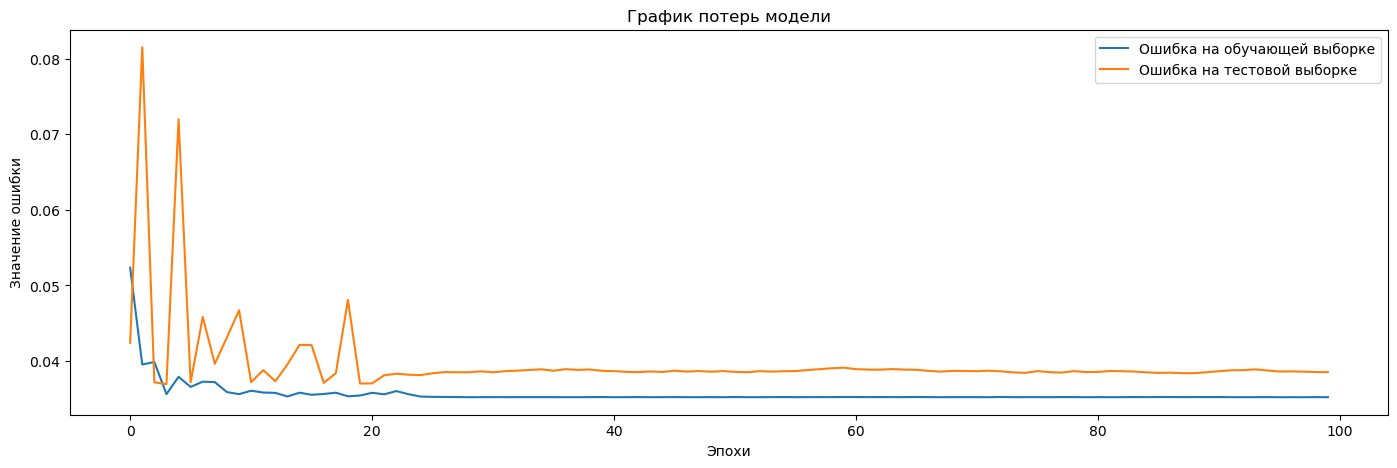

In [31]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(history):
 plt.figure(figsize = (17,5))
 plt.plot(history.history['loss'],
 label = 'ошибка на обучающей выборке')
 plt.plot(history.history['val_loss'],
 label = 'ошибка на тестовой выборке')
 plt.title('График потерь модели')
 plt.ylabel('Значение ошибки')
 plt.xlabel('Эпохи')
 plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
 plt.show()
model_loss_plot(history)

9/9 [==============================] - 0s 873us/step


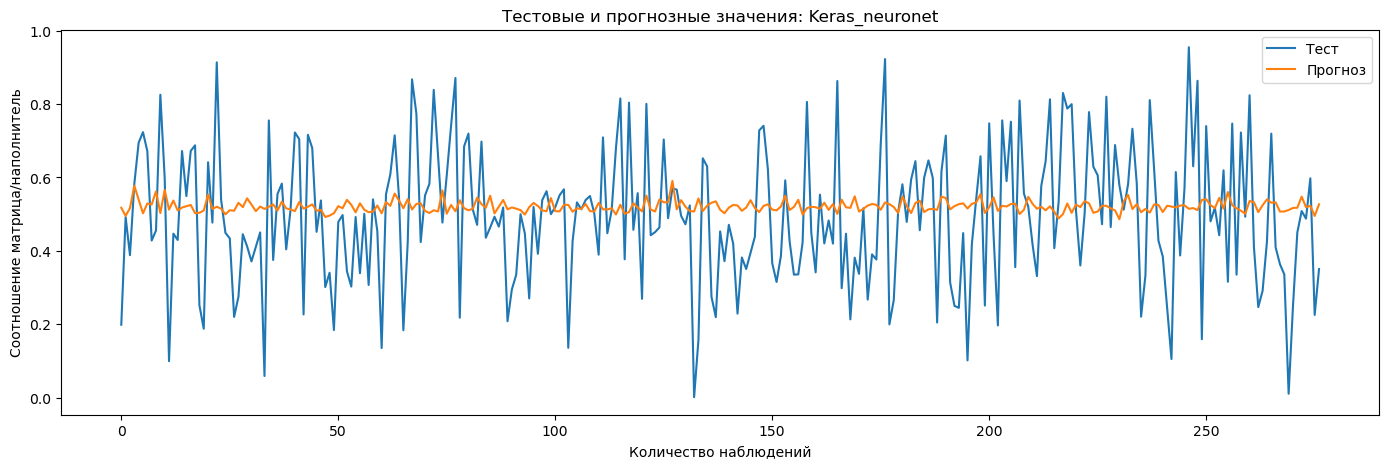

In [32]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name): 
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

In [33]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten() 
pred

9/9 [==============================] - 0s 623us/step


array([0.51723135, 0.49516267, 0.5164262 , 0.5772693 , 0.53942424,
       0.5020551 , 0.52891916, 0.5260096 , 0.5618414 , 0.50286543,
       0.5658634 , 0.5121787 , 0.5369238 , 0.51004016, 0.51789623,
       0.52139044, 0.52497476, 0.50247055, 0.50348616, 0.5097778 ,
       0.5535208 , 0.5139591 , 0.52010083, 0.5147587 , 0.49937817,
       0.51057696, 0.5090714 , 0.5307473 , 0.518978  , 0.54304725,
       0.5259875 , 0.50802284, 0.5205772 , 0.5140285 , 0.5197868 ,
       0.5264167 , 0.509765  , 0.5341323 , 0.5155871 , 0.5127304 ,
       0.508142  , 0.5330291 , 0.51491696, 0.51997054, 0.52662057,
       0.50911254, 0.5114515 , 0.49217194, 0.4960119 , 0.50235194,
       0.5218097 , 0.51601464, 0.5389058 , 0.5253379 , 0.50488496,
       0.52949476, 0.5118218 , 0.5051195 , 0.50681597, 0.5232486 ,
       0.50223637, 0.53273666, 0.52248806, 0.5560797 , 0.5369308 ,
       0.5159595 , 0.5407574 , 0.5125802 , 0.52758706, 0.5295626 ,
       0.50858676, 0.5030259 , 0.51051664, 0.50718296, 0.56468

In [34]:
# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_test = y_test * max_y + min_y

In [35]:
pred

array([3.012905 , 2.907709 , 3.009067 , 3.299091 , 3.1186929, 2.9405634,
       3.0686178, 3.0547488, 3.2255502, 2.944426 , 3.2447217, 2.9888203,
       3.106774 , 2.9786263, 3.0160742, 3.0327303, 3.049816 , 2.9425437,
       2.9473848, 2.9773755, 3.1858878, 2.9973068, 3.026583 , 3.0011184,
       2.9278033, 2.981185 , 2.9740086, 3.077332 , 3.0212307, 3.135963 ,
       3.0546434, 2.96901  , 3.0288537, 2.9976377, 3.025086 , 3.0566893,
       2.9773147, 3.0934675, 3.005067 , 2.99145  , 2.9695783, 3.0882087,
       3.0018728, 3.0259619, 3.057661 , 2.9742045, 2.9853537, 2.893453 ,
       2.911757 , 2.9419785, 3.0347288, 3.007105 , 3.1162217, 3.0515466,
       2.9540527, 3.0713615, 2.987119 , 2.9551706, 2.9632573, 3.0415876,
       2.9414275, 3.0868149, 3.0379622, 3.1980853, 3.1068072, 3.0068424,
       3.125048 , 2.990734 , 3.062268 , 3.0716848, 2.9716983, 2.945191 ,
       2.9808974, 2.9650066, 3.2391212, 2.9362814, 3.0494711, 2.9678283,
       3.1112554, 3.007243 , 2.9801583, 2.9991605, 

In [36]:
# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)


0.7186024273820999


In [37]:
# Средняя цена по выборке
print(np.mean(y_test))

2.898330911860213


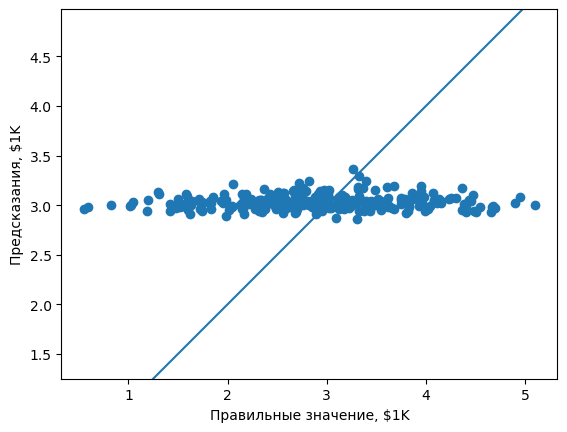

In [38]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')

plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

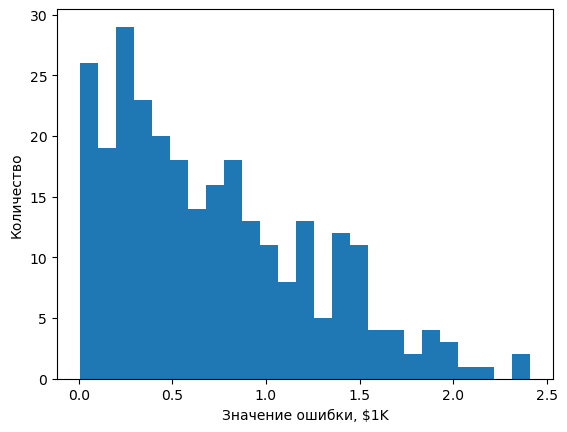

In [39]:
#Разность предсказанного и правильного ответа
error = pred - y_test
#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

In [36]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
